In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.drop('customerID', axis=1, inplace=True)

In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [5]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [6]:
df = pd.get_dummies(df, drop_first=True)

In [7]:
df['Churn'] = df['Churn_Yes']
df.drop(['Churn_Yes'], axis=1, inplace=True)

In [8]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [12]:
y_pred_logreg = logreg.predict(X_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.8130619971604354
[[1387  152]
 [ 243  331]]
              precision    recall  f1-score   support

       False       0.85      0.90      0.88      1539
        True       0.69      0.58      0.63       574

    accuracy                           0.81      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.81      0.81      0.81      2113



In [13]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
y_pred_rf = rf.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7931850449597728
[[1405  134]
 [ 303  271]]
              precision    recall  f1-score   support

       False       0.82      0.91      0.87      1539
        True       0.67      0.47      0.55       574

    accuracy                           0.79      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



In [15]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [16]:
print("Best Parameters for Random Forest:", grid_rf.best_params_)

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [17]:
best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print('Tuned Random Forest Accuracy:', accuracy_score(y_test, y_pred_best_rf))
print(confusion_matrix(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))

Tuned Random Forest Accuracy: 0.8050165641268339
[[1412  127]
 [ 285  289]]
              precision    recall  f1-score   support

       False       0.83      0.92      0.87      1539
        True       0.69      0.50      0.58       574

    accuracy                           0.81      2113
   macro avg       0.76      0.71      0.73      2113
weighted avg       0.79      0.81      0.79      2113



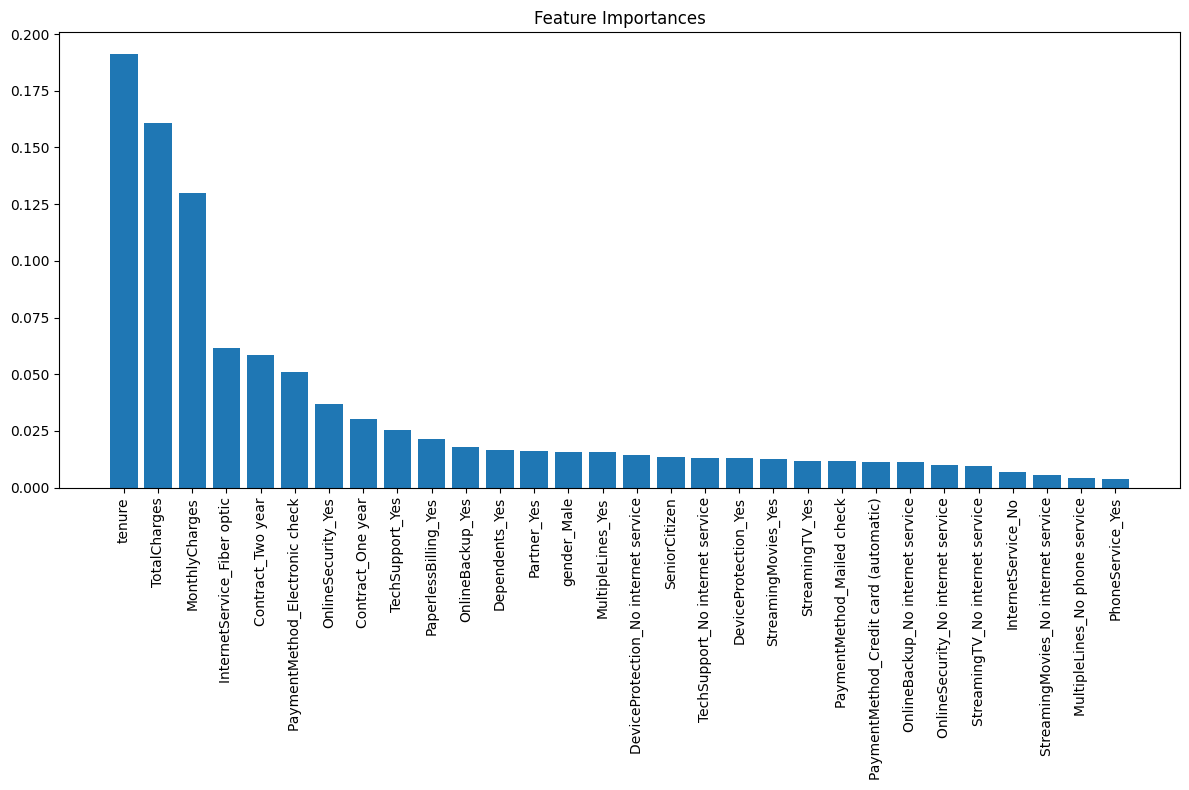

In [18]:
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()